## Getting Tools Ready

In [1]:
# Import the required libraries

#1. Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To show the plots within the notebook
%matplotlib inline
import seaborn as sns

#2. Preprocessing and Modelling
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

## Understanding The Data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


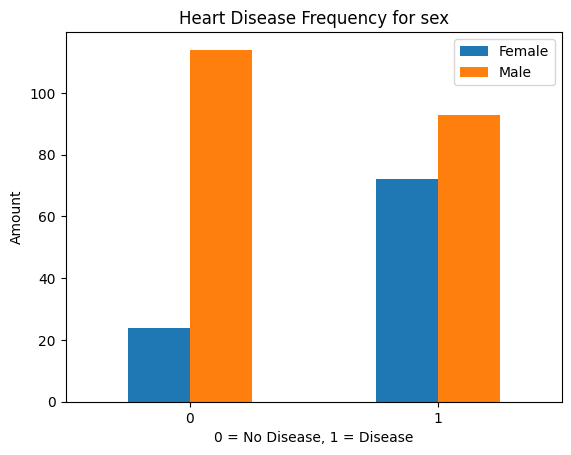

In [14]:
pd.crosstab(df.target, df.sex).plot(kind = "bar")
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation  = 0)
plt.show();

### Age vs. Max Heart Rate for Heart Disease

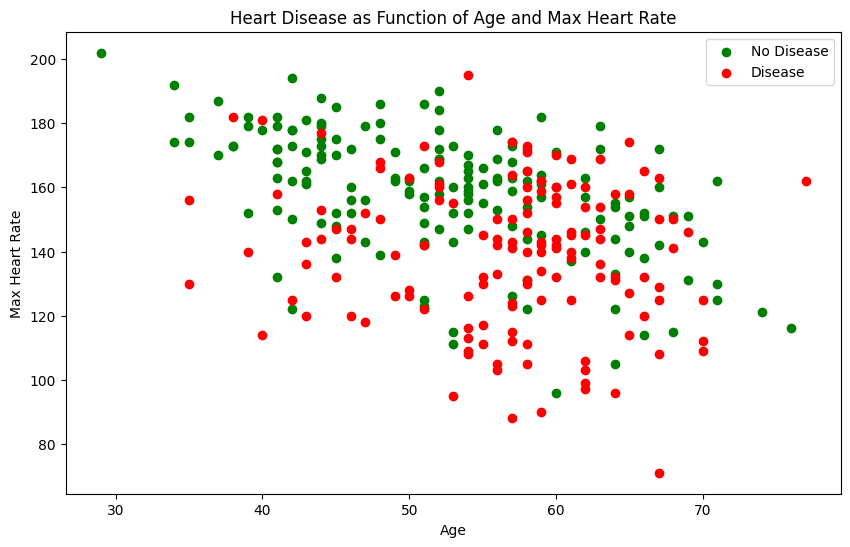

In [15]:
plt.figure(figsize = (10, 6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color = "green")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color = "red")

plt.title("Heart Disease as Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No Disease", "Disease"])
plt.show();

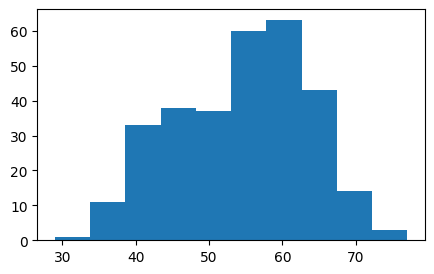

In [16]:
# Check the distribution of the age column with the help of histogram
plt.figure(figsize = (5, 3))
plt.hist(df["age"]);

### Heart Disease Frequecy per Chest Pain Type

In [17]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [18]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


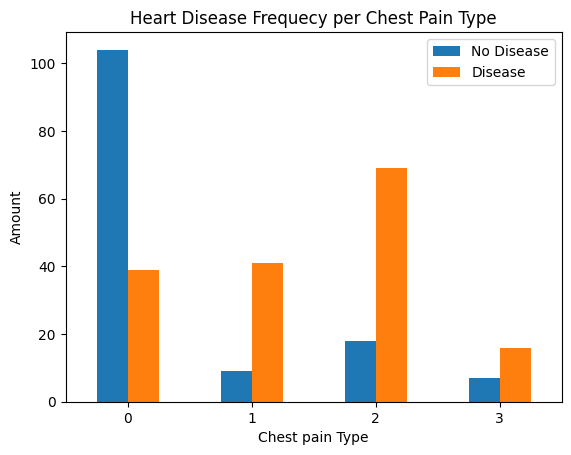

In [19]:
pd.crosstab(df["cp"], df["target"]).plot(kind = "bar")
plt.title("Heart Disease Frequecy per Chest Pain Type")
plt.xticks(rotation = 0)
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.show();

### Checking The Correlation 

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


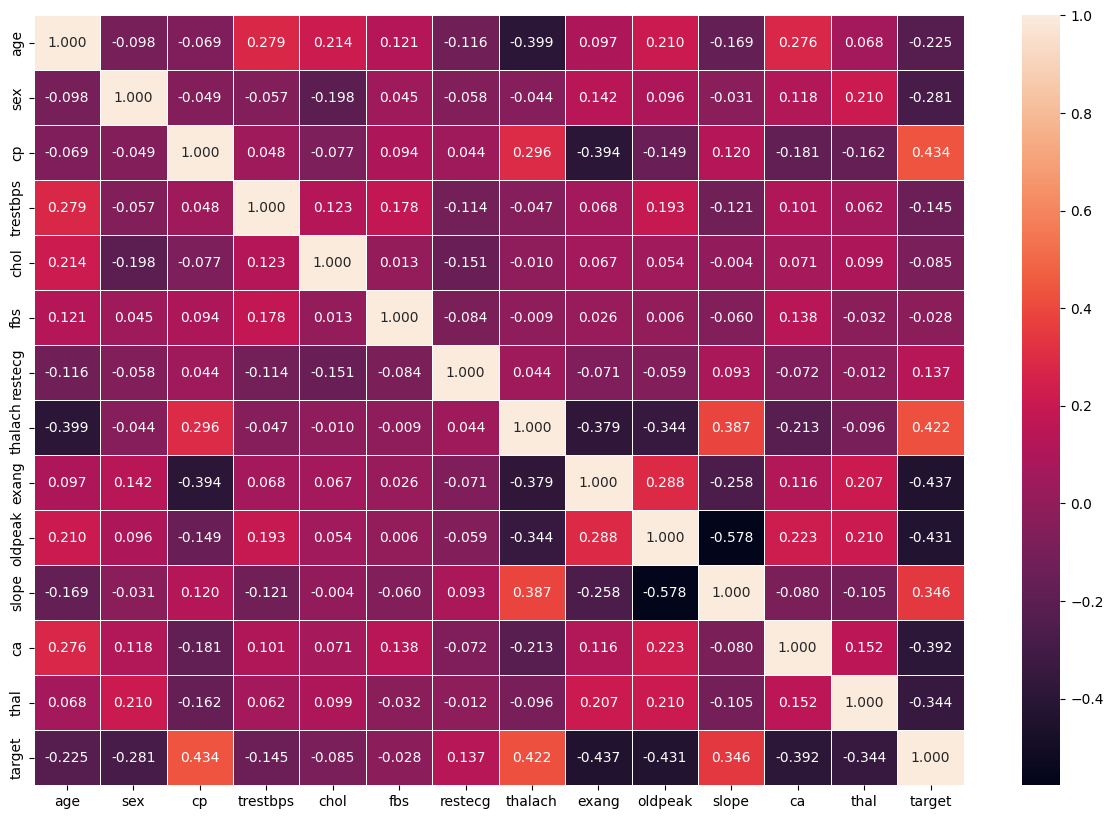

In [68]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_mat, annot = True, linewidth = 0.5, fmt = ".3f")

## Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into features and target
X = df.drop("target", axis = 1)
y = df["target"]
# X.head(2)
# y.head(2)

In [24]:
# train test split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [26]:
# Dictionary of models
models = {"Logistic Regression": LogisticRegression(),
          "KNeighbors": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

# Train, fit and score each of these models
def modelling(models, X_train, y_train, X_test, y_test):
    """
    This function trains, fits and scores each of the models in dict 'models'.
    Arguments:
    1. models: Dict of models
    2. X_trains: Train feature labels
    3. y_train: Train target labels
    4. X_test: Test feature labels
    5. y_test: Test target labels
    """
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [27]:
model_scores = modelling(models, X_train, y_train, X_test, y_test)
model_scores

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNeighbors': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [28]:
model_comparison = pd.DataFrame(model_scores, index = ["accuracy"])
model_comparison.T

,accuracy
Logistic Regression,0.885246
KNeighbors,0.688525
Random Forest Classifier,0.836066


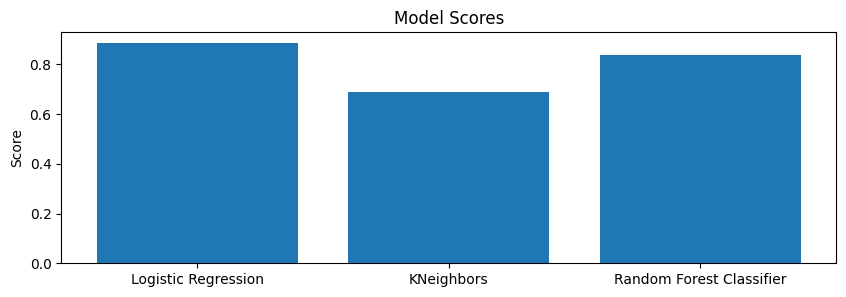

In [29]:
plt.figure(figsize = (10, 3))
plt.bar(model_scores.keys(), model_scores.values())
plt.title("Model Scores")
# plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show();

## Improvising The Model
* Hyperparameter Tuning
* Feature importance

In [30]:
train_scores = []
test_scores = []

# Create a list of different parameters for n_neighbors
neighbors = range(1, 21)
# KNN instance
knn = KNeighborsClassifier()

# Loop for different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

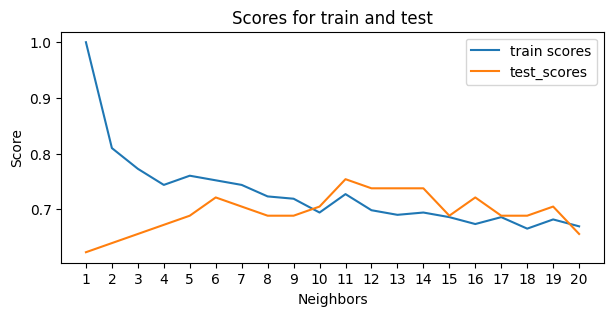

Maximum score for train data: 100.00%
Maximum score for test data: 75.41%


In [33]:
plt.figure(figsize=(7, 3))
plt.plot(neighbors, train_scores)
plt.plot(neighbors, test_scores)
plt.legend(["train scores", "test_scores"])
plt.title("Scores for train and test")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Neighbors")
plt.ylabel("Score")
plt.show();

print(f"Maximum score for train data: {max(train_scores)*100:.2f}%")
print(f"Maximum score for test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV
Tune 
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [34]:
## Creating hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

## Creating hyperparameter grid for RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 4, 5],
           "min_samples_split": np.arange(2, 20, 3),
           "min_samples_leaf": np.arange(1, 10, 2)}

## Tune LogisticRegression()


In [35]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

## Tune RandomForestClassifier

In [38]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 4, 5],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [40]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

In [41]:
## Creating hyperparameter grid for LogisticRegression
log_re_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_re_grid,
                          cv=3,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [43]:
y_pred = gs_log_reg.predict(X_test)

## Evaluating Models
* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

In [44]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import roc_curve

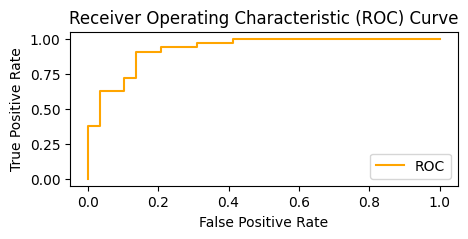

In [47]:
y_probs = gs_log_reg.predict_proba(X_test)
y_probs[:5]
y_probs_positive = y_probs[:, 1]
# y_probs_positive[:5]
# Calculate, fpr, tps and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(5, 2))
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
#     plt.plot([0, 1], [0, 1], linestyle = "--", label = "Guessing")
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [48]:
# Confusion matrix
c = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

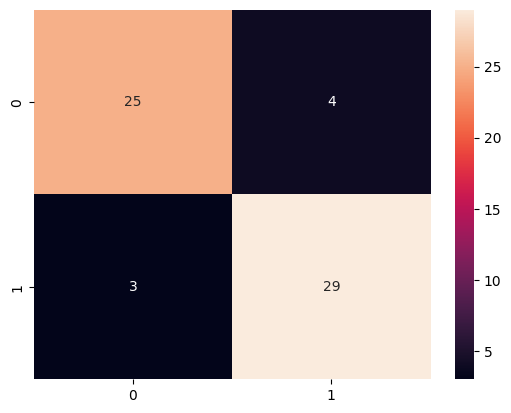

In [49]:
sns.heatmap(c, annot=True)

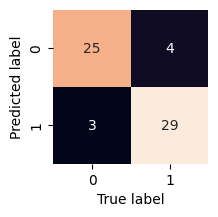

In [50]:
# sns.set(font_size=1.5)

def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(2, 2))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cbar = False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_pred)

In [51]:
# Classification report  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics with CV

cross_val_score()

In [52]:
# Check the best parameters(hyper)
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [53]:
# Create a new classifier using best params
clf = LogisticRegression(C = 0.38566204211634725,
                         solver='liblinear')

In [54]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

In [55]:
cv_acc = cv_acc.mean()
cv_acc

0.8380874316939891

In [56]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

In [57]:
cv_precision = cv_precision.mean()
cv_precision

0.8154667272314331

In [58]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

In [59]:
cv_recall = cv_recall.mean()
cv_recall

0.9151515151515153

In [60]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

In [61]:
cv_f1 = cv_f1.mean()
cv_f1

0.8614850462777628

In [62]:
# Visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-Score": cv_f1},
                            index=[0])

cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.838087,0.815467,0.915152,0.861485


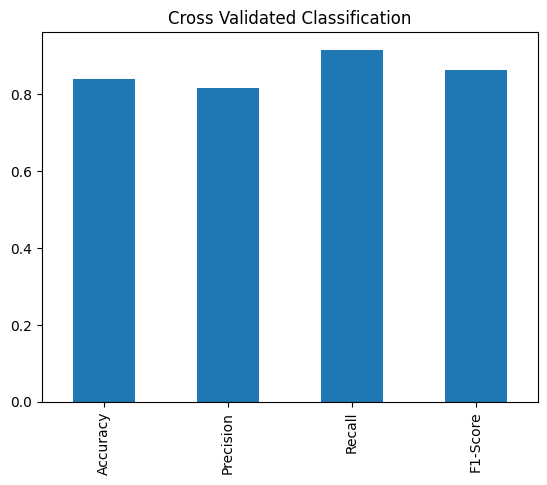

In [63]:
cv_metrics.T.plot.bar(title="Cross Validated Classification", legend=False);

## Feature Importance

In [64]:
# Create a new classifier using best params
clf = LogisticRegression(C = 0.38566204211634725,
                         solver='liblinear')

clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00538932, -1.07571319,  0.72132332, -0.01184245, -0.00191341,
         0.07565561,  0.40415609,  0.02539571, -0.73077317, -0.59417284,
         0.54469985, -0.70259002, -0.77001609]])

In [65]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.005389316653491545,
 'sex': -1.075713187112048,
 'cp': 0.7213233182673147,
 'trestbps': -0.011842451294962737,
 'chol': -0.0019134054489397538,
 'fbs': 0.07565561162725211,
 'restecg': 0.404156093528802,
 'thalach': 0.025395712413475487,
 'exang': -0.7307731681203735,
 'oldpeak': -0.5941728424325737,
 'slope': 0.544699846458767,
 'ca': -0.7025900230070519,
 'thal': -0.7700160881737422}

In [66]:
feature_df = pd.DataFrame(feature_dict, index = range(0, len(feature_dict.keys())))
feature_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.005389,-1.075713,0.721323,-0.011842,-0.001913,0.075656,0.404156,0.025396,-0.730773,-0.594173,0.5447,-0.70259,-0.770016
1,0.005389,-1.075713,0.721323,-0.011842,-0.001913,0.075656,0.404156,0.025396,-0.730773,-0.594173,0.5447,-0.70259,-0.770016
2,0.005389,-1.075713,0.721323,-0.011842,-0.001913,0.075656,0.404156,0.025396,-0.730773,-0.594173,0.5447,-0.70259,-0.770016
3,0.005389,-1.075713,0.721323,-0.011842,-0.001913,0.075656,0.404156,0.025396,-0.730773,-0.594173,0.5447,-0.70259,-0.770016
4,0.005389,-1.075713,0.721323,-0.011842,-0.001913,0.075656,0.404156,0.025396,-0.730773,-0.594173,0.5447,-0.70259,-0.770016


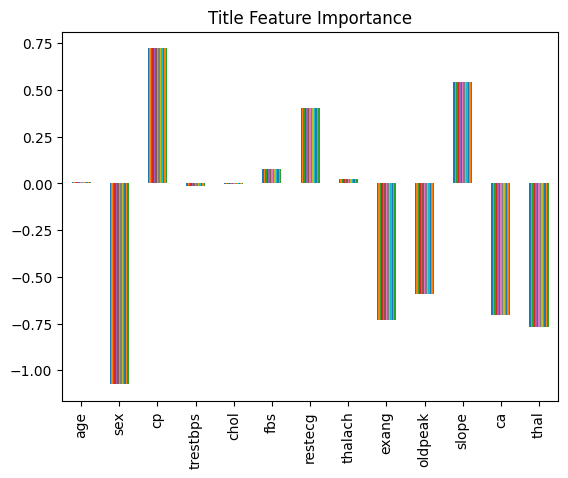

In [67]:
feature_df.T.plot.bar(title="Title Feature Importance", legend = False);